Chargement du dataset Iris...
Aperçu des données Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
Dimensions du dataset: (150, 4)

Normalisation des données...

=== Tests avec K = 2 ===

Notre implémentation de K-means:
Adjusted Rand Index: 0.5681
Inertie: 222.3617

Implémentation scikit-learn de K-means:
Adjusted Rand Index: 0.5681
Inertie: 222.3617


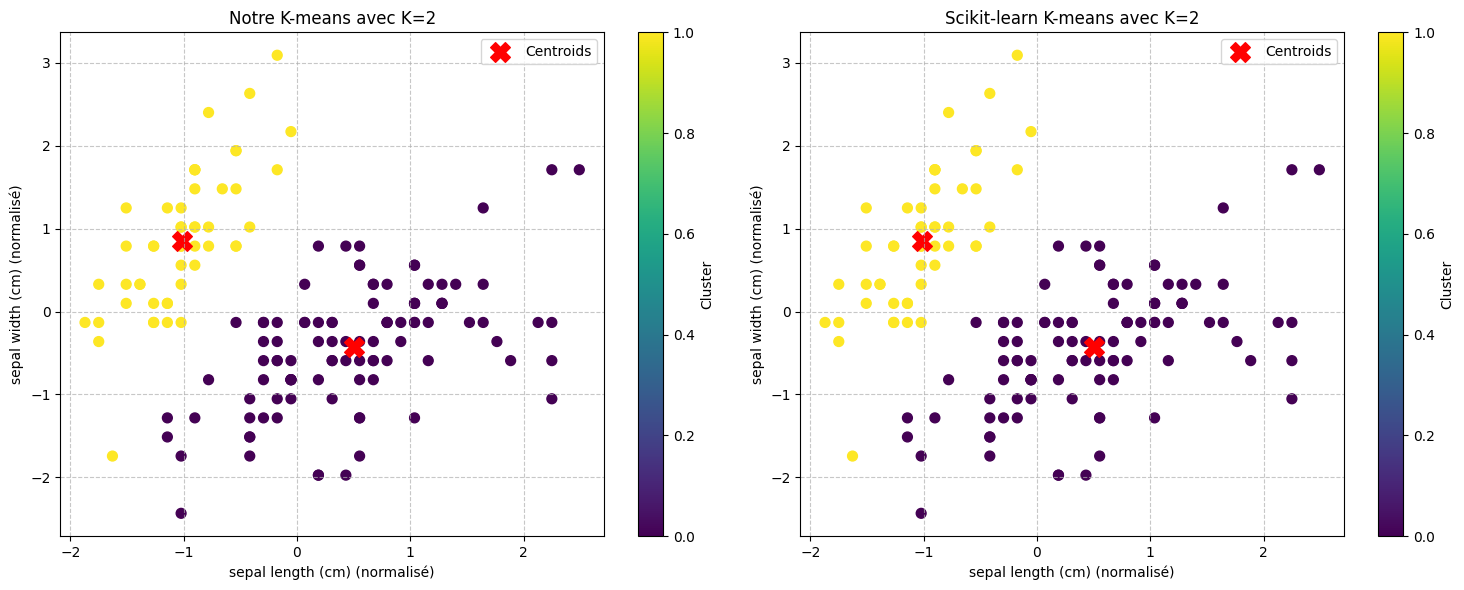


Distribution des espèces dans chaque cluster:
Notre implémentation:
Species   0   1   2
Cluster            
0         0  50  50
1        50   0   0

Implémentation scikit-learn:
Species   0   1   2
Cluster            
0         0  50  50
1        50   0   0

=== Tests avec K = 3 ===

Notre implémentation de K-means:
Adjusted Rand Index: 0.5923
Inertie: 140.0328

Implémentation scikit-learn de K-means:
Adjusted Rand Index: 0.6201
Inertie: 139.8205


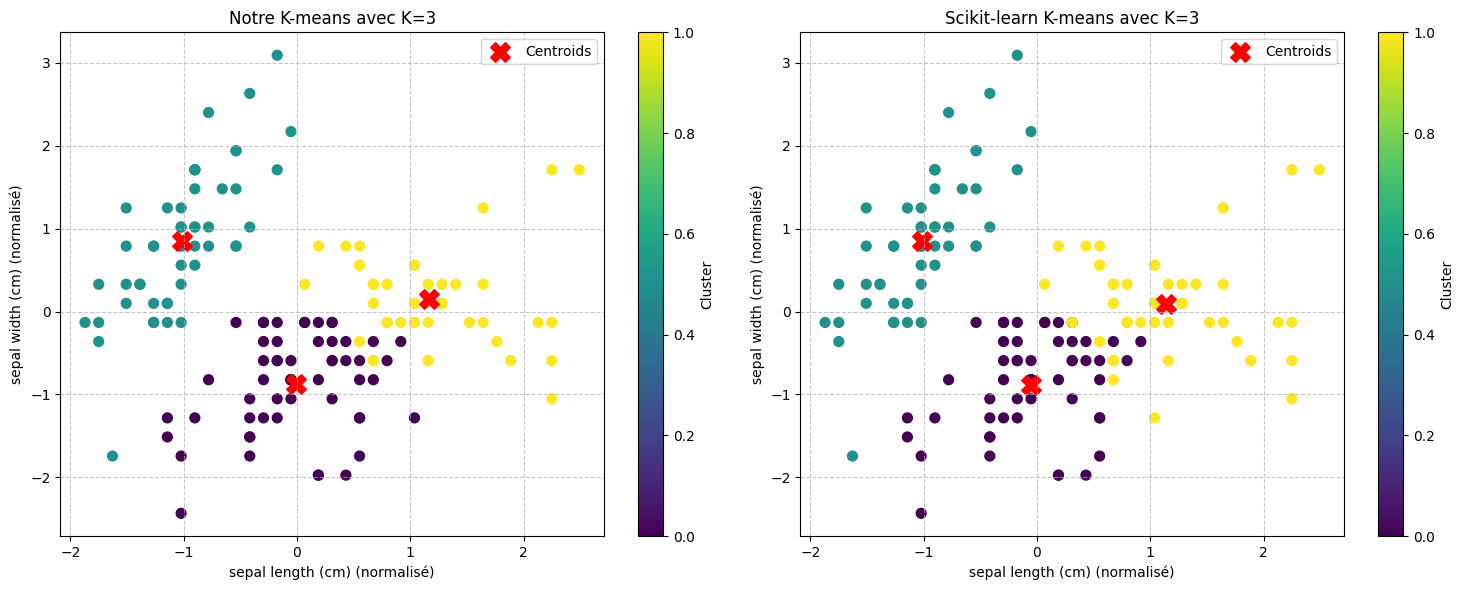


Distribution des espèces dans chaque cluster:
Notre implémentation:
Species   0   1   2
Cluster            
0         0  39  17
1        50   0   0
2         0  11  33

Implémentation scikit-learn:
Species   0   1   2
Cluster            
0         0  39  14
1        50   0   0
2         0  11  36

Résumé des résultats:
   K                  Impl       ARI     Inertia
0  2         Notre K-means  0.568116  222.361705
1  2  Scikit-learn K-means  0.568116  222.361705
2  3         Notre K-means  0.592333  140.032753
3  3  Scikit-learn K-means  0.620135  139.820496

Analyse comparative:
Pour K = 2:
  Différence d'ARI: 0.0000 (positif = notre implémentation est meilleure)
  Différence d'Inertie: 0.0000 (négatif = notre implémentation est meilleure)
Pour K = 3:
  Différence d'ARI: -0.0278 (positif = notre implémentation est meilleure)
  Différence d'Inertie: 0.2123 (négatif = notre implémentation est meilleure)

Conclusion:
Meilleur K selon ARI pour notre implémentation: K = 3
Meilleur K selo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans as SKLearnKMeans

class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4, random_state=None):
        """
        Initialize KMeans algorithm.

        Parameters:
        -----------
        n_clusters : int, default=3
            Number of clusters to form.
        max_iter : int, default=100
            Maximum number of iterations of the algorithm.
        tol : float, default=1e-4
            Relative tolerance with regards to inertia to declare convergence.
        random_state : int, default=None
            Seed for random number generator.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.inertia_ = None

    def fit(self, X):
        """
        Compute k-means clustering.

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training instances to cluster.

        Returns:
        --------
        self : object
            Fitted estimator.
        """
        # Set random state for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Get dimensions of data
        n_samples, n_features = X.shape

        # Initialize centroids by randomly selecting from data points
        # Following Algorithm 1 in the PDF, line 1
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        # Initialize labels
        old_labels = np.zeros(n_samples)

        # Iterative algorithm (lines 2-8 in Algorithm 1)
        for iteration in range(self.max_iter):
            # Calculate distances between all points and all centroids
            distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))

            # Assign each point to the nearest centroid (line 4)
            self.labels_ = np.argmin(distances, axis=1)

            # Check for convergence (if labels haven't changed)
            if np.all(old_labels == self.labels_):
                break

            old_labels = self.labels_.copy()

            # Update centroids based on new cluster assignments (line 6)
            for k in range(self.n_clusters):
                if np.sum(self.labels_ == k) > 0:  # Avoid empty clusters
                    self.centroids[k] = np.mean(X[self.labels_ == k], axis=0)

        # Calculate inertia (sum of squared distances to closest centroid)
        # This corresponds to J in equation (1) of the PDF
        self.inertia_ = 0
        for k in range(self.n_clusters):
            cluster_points = X[self.labels_ == k]
            if len(cluster_points) > 0:
                self.inertia_ += np.sum((cluster_points - self.centroids[k]) ** 2)

        return self

    def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            New data to predict.

        Returns:
        --------
        labels : array of shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        # Calculate distances between all points and all centroids
        distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))

        # Return cluster index for each point
        return np.argmin(distances, axis=1)


# 1. Charger le dataset Iris
print("Chargement du dataset Iris...")
iris = load_iris()
X = iris.data
y_true = iris.target

# Créer un DataFrame pour une meilleure visualisation des données
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])
print("Aperçu des données Iris:")
print(iris_df.head())
print(f"Dimensions du dataset: {X.shape}")

# 2. Normaliser les données
print("\nNormalisation des données...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Sélectionner deux valeurs de K pour l'entraînement
k_values = [2, 3]

# 4. Entrainer les modèles et évaluer les performances pour chaque K
results = []

for k in k_values:
    print(f"\n=== Tests avec K = {k} ===")

    # A. Notre implémentation de K-means
    print("\nNotre implémentation de K-means:")
    custom_model = KMeans(n_clusters=k, random_state=42, max_iter=100)
    custom_model.fit(X_scaled)
    custom_pred = custom_model.labels_

    # Calculer les métriques d'évaluation
    custom_ari = adjusted_rand_score(y_true, custom_pred)
    custom_inertia = custom_model.inertia_

    print(f"Adjusted Rand Index: {custom_ari:.4f}")
    print(f"Inertie: {custom_inertia:.4f}")

    # B. Implémentation scikit-learn de K-means
    print("\nImplémentation scikit-learn de K-means:")
    sklearn_model = SKLearnKMeans(n_clusters=k, random_state=42, n_init=10)
    sklearn_model.fit(X_scaled)
    sklearn_pred = sklearn_model.labels_

    # Calculer les métriques d'évaluation
    sklearn_ari = adjusted_rand_score(y_true, sklearn_pred)
    sklearn_inertia = sklearn_model.inertia_

    print(f"Adjusted Rand Index: {sklearn_ari:.4f}")
    print(f"Inertie: {sklearn_inertia:.4f}")

    # Stocker les résultats
    results.append({
        'K': k,
        'Impl': 'Notre K-means',
        'ARI': custom_ari,
        'Inertia': custom_inertia
    })
    results.append({
        'K': k,
        'Impl': 'Scikit-learn K-means',
        'ARI': sklearn_ari,
        'Inertia': sklearn_inertia
    })

    # 5. Visualiser les clusters et les centroïdes pour les deux implémentations
    plt.figure(figsize=(15, 6))

    # Notre implémentation
    plt.subplot(1, 2, 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=custom_pred, cmap='viridis', s=50)
    plt.scatter(custom_model.centroids[:, 0], custom_model.centroids[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    plt.title(f'Notre K-means avec K={k}')
    plt.xlabel(f"{iris.feature_names[0]} (normalisé)")
    plt.ylabel(f"{iris.feature_names[1]} (normalisé)")
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Scikit-learn implémentation
    plt.subplot(1, 2, 2)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=sklearn_pred, cmap='viridis', s=50)
    plt.scatter(sklearn_model.cluster_centers_[:, 0], sklearn_model.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    plt.title(f'Scikit-learn K-means avec K={k}')
    plt.xlabel(f"{iris.feature_names[0]} (normalisé)")
    plt.ylabel(f"{iris.feature_names[1]} (normalisé)")
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f'iris_kmeans_comparison_k{k}.png')
    plt.show()

    # 6. Analyser la distribution des espèces réelles dans chaque cluster
    print("\nDistribution des espèces dans chaque cluster:")

    print("Notre implémentation:")
    custom_cluster_species = pd.DataFrame({
        'Cluster': custom_pred,
        'Species': y_true
    })
    custom_distribution = pd.crosstab(
        custom_cluster_species['Cluster'],
        custom_cluster_species['Species'],
        rownames=['Cluster'],
        colnames=['Species']
    )
    print(custom_distribution)

    print("\nImplémentation scikit-learn:")
    sklearn_cluster_species = pd.DataFrame({
        'Cluster': sklearn_pred,
        'Species': y_true
    })
    sklearn_distribution = pd.crosstab(
        sklearn_cluster_species['Cluster'],
        sklearn_cluster_species['Species'],
        rownames=['Cluster'],
        colnames=['Species']
    )
    print(sklearn_distribution)

# 7. Résumé des résultats
results_df = pd.DataFrame(results)
print("\nRésumé des résultats:")
print(results_df)

# 8. Comparer les performances des deux implémentations
print("\nAnalyse comparative:")

# Calculer les différences de performance
for k in k_values:
    custom_results = results_df[(results_df['K'] == k) & (results_df['Impl'] == 'Notre K-means')]
    sklearn_results = results_df[(results_df['K'] == k) & (results_df['Impl'] == 'Scikit-learn K-means')]

    ari_diff = custom_results['ARI'].values[0] - sklearn_results['ARI'].values[0]
    inertia_diff = custom_results['Inertia'].values[0] - sklearn_results['Inertia'].values[0]

    print(f"Pour K = {k}:")
    print(f"  Différence d'ARI: {ari_diff:.4f} (positif = notre implémentation est meilleure)")
    print(f"  Différence d'Inertie: {inertia_diff:.4f} (négatif = notre implémentation est meilleure)")

# 9. Conclusion globale
print("\nConclusion:")
best_custom_k = results_df[results_df['Impl'] == 'Notre K-means']['ARI'].idxmax()
best_sklearn_k = results_df[results_df['Impl'] == 'Scikit-learn K-means']['ARI'].idxmax()

print(f"Meilleur K selon ARI pour notre implémentation: K = {results_df.loc[best_custom_k, 'K']}")
print(f"Meilleur K selon ARI pour scikit-learn: K = {results_df.loc[best_sklearn_k, 'K']}")

if results_df.loc[best_custom_k, 'K'] == results_df.loc[best_sklearn_k, 'K']:
    best_k = results_df.loc[best_custom_k, 'K']
    print(f"Les deux implémentations suggèrent que K = {best_k} est le meilleur choix pour ce dataset.")
else:
    print("Les deux implémentations ne sont pas en accord sur le meilleur K.")

# Tableau d'analyse critique
critique_data = {
    'Traitement': ['K=2', 'K=3'],
    'Résultats Notre Implémentation': [
        f"ARI: {results_df[(results_df['K'] == 2) & (results_df['Impl'] == 'Notre K-means')]['ARI'].values[0]:.4f}, Inertia: {results_df[(results_df['K'] == 2) & (results_df['Impl'] == 'Notre K-means')]['Inertia'].values[0]:.4f}",
        f"ARI: {results_df[(results_df['K'] == 3) & (results_df['Impl'] == 'Notre K-means')]['ARI'].values[0]:.4f}, Inertia: {results_df[(results_df['K'] == 3) & (results_df['Impl'] == 'Notre K-means')]['Inertia'].values[0]:.4f}"
    ],
    'Résultats Scikit-learn': [
        f"ARI: {results_df[(results_df['K'] == 2) & (results_df['Impl'] == 'Scikit-learn K-means')]['ARI'].values[0]:.4f}, Inertia: {results_df[(results_df['K'] == 2) & (results_df['Impl'] == 'Scikit-learn K-means')]['Inertia'].values[0]:.4f}",
        f"ARI: {results_df[(results_df['K'] == 3) & (results_df['Impl'] == 'Scikit-learn K-means')]['ARI'].values[0]:.4f}, Inertia: {results_df[(results_df['K'] == 3) & (results_df['Impl'] == 'Scikit-learn K-means')]['Inertia'].values[0]:.4f}"
    ],
    'Conclusions': [
        "À remplir d'après l'analyse des résultats",
        "À remplir d'après l'analyse des résultats"
    ]
}

critique_df = pd.DataFrame(critique_data)
print("\nTableau d'analyse critique:")
print(critique_df)